In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sklearn

sns.set(font_scale=1.3)
np.random.seed(42)

from sklearn.datasets import make_moons

### 1. Data

In [25]:
raw_data = make_moons(n_samples=2000, random_state=42, noise=0.25)

In [31]:
data = raw_data[0]
target = raw_data[1]

df = pd.DataFrame({'x1': data[:,0], 'x2': data[:,1], 'target': target})

In [32]:
df.head()

,x1,x2,target
0,1.582305,0.366876,1
1,0.327654,0.982366,0
2,0.488270,-0.246765,1
3,-0.937421,-0.029429,0
4,0.634397,-0.412224,1


In [47]:
px.scatter(df, x='x1', y='x2', color='target', title='Classification x1, x2', 
           color_continuous_scale=px.colors.sequential.Viridis, opacity=0.7)

### 2. Train/test split

In [48]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42
                                                   )
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (1500, 2)
X_test shape: (500, 2)
y_train shape: (1500,)
y_test shape: (500,)


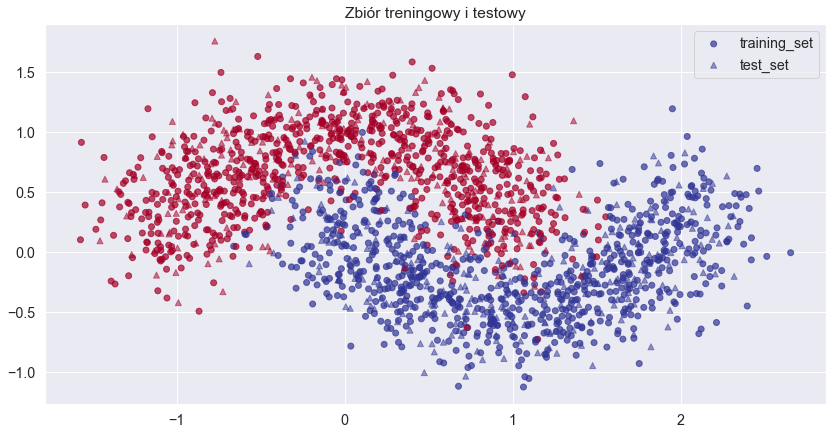

In [62]:
plt.figure(figsize=(14, 7))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='RdYlBu', alpha=0.7, label = 'training_set')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='RdYlBu', marker='^', alpha=0.5, label='test_set')
plt.title('Zbiór treningowy i testowy')
plt.legend()
plt.show()

### 3. Przeszukiwanie siatki

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [72]:
classifier = DecisionTreeClassifier()

params = {'max_depth': np.arange(1, 15),
         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]}

grid_search = GridSearchCV(classifier, param_grid=params, scoring='accuracy', cv=10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20]},
             scoring='accuracy')

#### - najlepsze parametry

In [77]:
grid_search.best_params_

{'max_depth': 6, 'min_samples_leaf': 6}

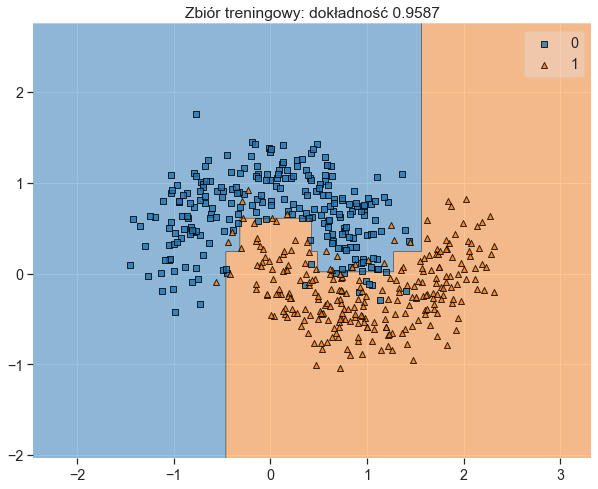

In [78]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Zbiór treningowy: dokładność {grid_search.score(X_train, y_train):.4f}')
plt.show()

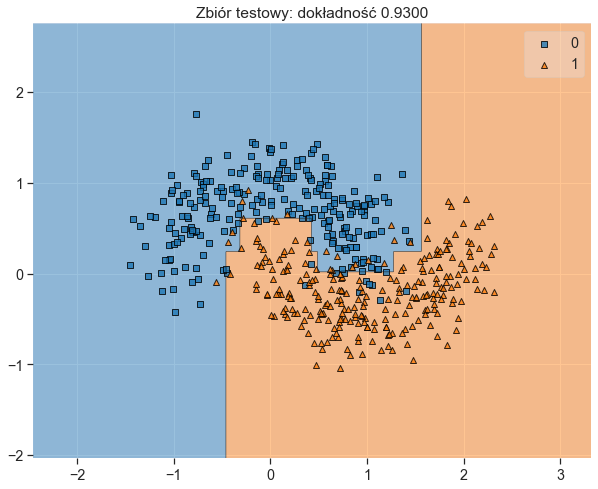

In [79]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Zbiór testowy: dokładność {grid_search.score(X_test, y_test):.4f}')
plt.show()

### 4. Przeszukiwanie siatki - gini and entropy params

In [80]:
from sklearn.model_selection import GridSearchCV

classifier = DecisionTreeClassifier(random_state=42)

param_grid = {'criterion': ['gini', 'entropy'], 
              'max_depth': np.arange(1, 10), 
              'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]}

grid_search = GridSearchCV(classifier, param_grid=param_grid, n_jobs=-1, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20]},
             scoring='accuracy')

In [81]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 6}

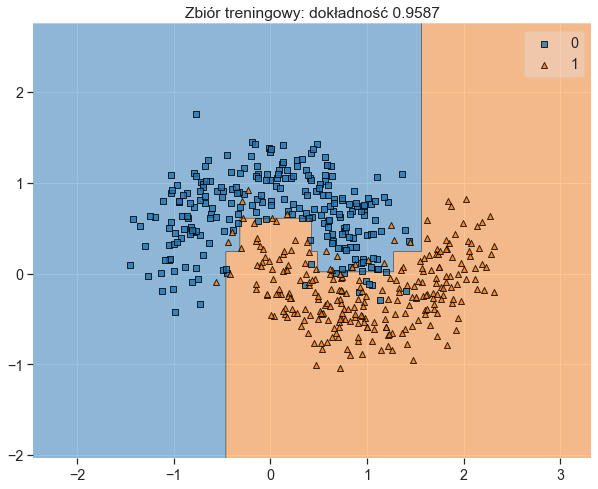

In [82]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Zbiór treningowy: dokładność {grid_search.score(X_train, y_train):.4f}')
plt.show()

### 5. Dwa parametry:

In [86]:
classifier = DecisionTreeClassifier(random_state=42)

param_grid = [
    {'criterion': ['gini'], 'max_depth': [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [2, 3, 4, 5, 6, 7]},
    {'criterion': ['entropy'], 'min_samples_leaf': [2, 3, 4, 5, 6, 7], 'max_depth': [1, 2, 3, 4, 5, 6, 7], }              
]

grid_search = GridSearchCV(classifier, param_grid=param_grid, n_jobs=-1, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'criterion': ['gini'],
                          'max_depth': [1, 2, 3, 4, 5, 6, 7],
                          'min_samples_leaf': [2, 3, 4, 5, 6, 7]},
                         {'criterion': ['entropy'],
                          'max_depth': [1, 2, 3, 4, 5, 6, 7],
                          'min_samples_leaf': [2, 3, 4, 5, 6, 7]}],
             scoring='accuracy')

In [87]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 6}

In [90]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, random_state=42)

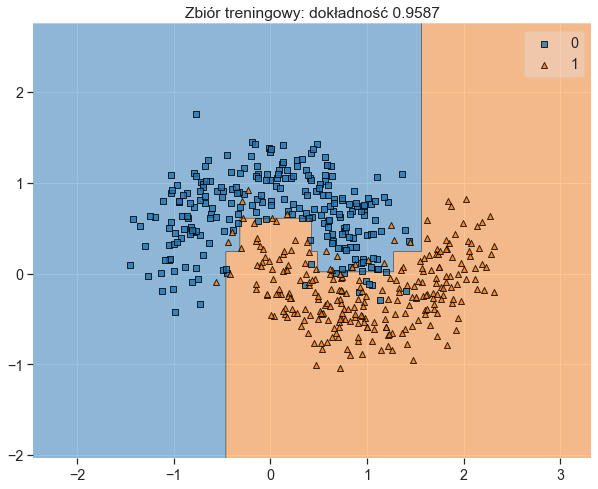

In [88]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Zbiór treningowy: dokładność {grid_search.score(X_train, y_train):.4f}')
plt.show()

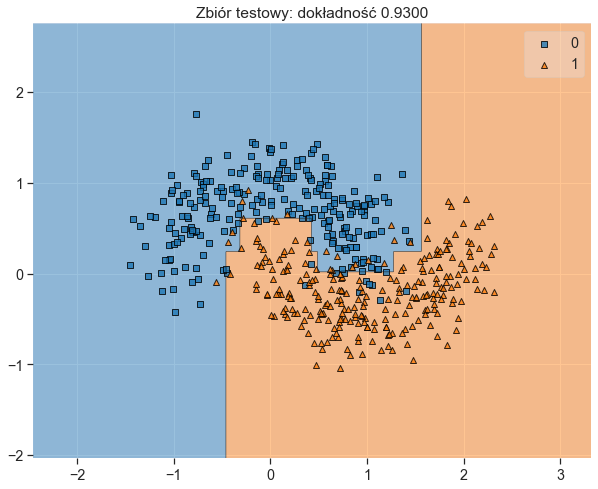

In [89]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Zbiór testowy: dokładność {grid_search.score(X_test, y_test):.4f}')
plt.show()

### 6. Model lasów losowych

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [103]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state=42)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': np.arange(4, 9),
    'min_samples_leaf': [4, 5, 6, 7, 8],
    'n_estimators': [100]
}

grid_search = GridSearchCV(classifier, param_grid=param_grid, n_jobs=-1, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([4, 5, 6, 7, 8]),
                         'min_samples_leaf': [4, 5, 6, 7, 8],
                         'n_estimators': [100]},
             scoring='accuracy')

In [104]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 5,
 'n_estimators': 100}

In [105]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=5,
                       random_state=42)

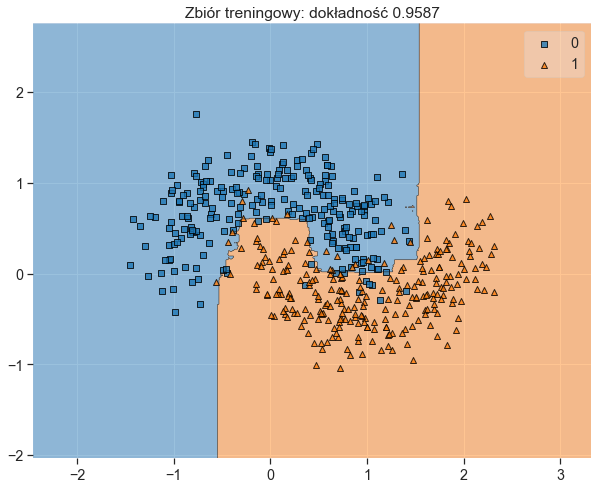

In [106]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Zbiór treningowy: dokładność {grid_search.score(X_train, y_train):.4f}')
plt.show()

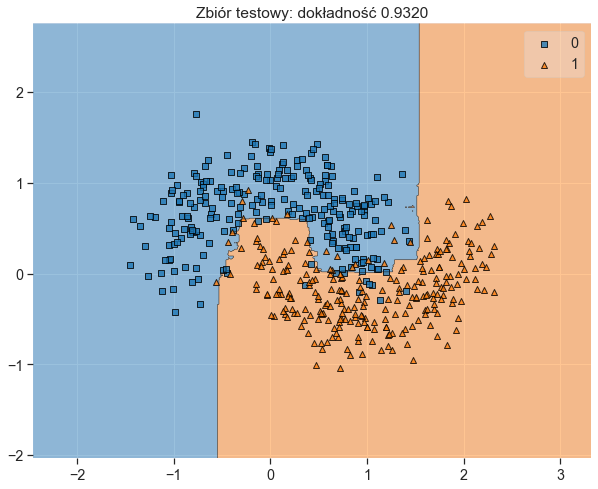

In [107]:
plt.figure(figsize=(10, 8))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Zbiór testowy: dokładność {grid_search.score(X_test, y_test):.4f}')
plt.show()